# Advance HPC - Project

## Versions

1. CPU (using numpy)
2. CPU (using pure python)
3. GPU (non-shared memory)
4. GPU (shared memory)

## Steps

Parameter $\omega$ as window size

- Convert RGB to HSV (SCATTER)
- For each pixel $\Phi(i, j)$
- Define use 4 windows $W^k$, $k \in [1..4]$ of size $(\omega + 1) \times (\omega + 1)$
	- $W^1_x \in [i - \omega, i]$, $W^1_y \in [j - \omega, j]$
	- $W^2_x \in [i, i + \omega]$, $W^2_y \in [j - \omega, j]$
	- $W^3_x \in [i - \omega, i]$, $W^3_y \in [j, j + \omega]$
	- $W^4_x \in [i, i + \omega]$, $W^4_y \in [j, j + \omega]$



- Find $W_l$, $l \in [1..4]$ having the lowest standard deviation of brightness.
	- Use $V$ in HSV color space to calculate SD.

- Assign mean $(R, G, B)$ value of this window $\left| W_l \right|_{\text{RGB}}$ as new color (REDUCE, MAP)

$$\Phi(i, j)_{\text{RGB}} = \left| W_l \right|_{\text{RGB}}$$


## Results

In [13]:
import pandas as pd

df = pd.read_csv('time_result.csv', header=None, names=['type', 'time', 'window_size', 'block_size'])

In [16]:
df

,type,time,window_size,block_size
0,cpu_numpy,68.953223,3,NaN
1,cpu_numpy,71.472559,5,NaN
2,cpu_numpy,67.938109,7,NaN
3,cpu_numpy,68.209134,9,NaN
4,cpu_numpy,66.368311,11,NaN
5,cpu_numpy,69.186078,13,NaN
6,cpu_numpy,73.795276,15,NaN
7,cpu_numpy,77.442831,17,NaN
8,cpu_numpy,81.551760,19,NaN
9,gpu_non_shared,0.718726,3,"(2, 2)"


ValueError: Invalid color type

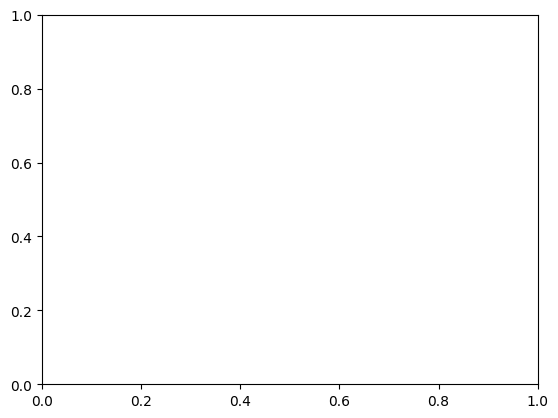

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
